# 🔧 Feature Engineering: Predicción de Brotes en Crohn

**Objetivo:** Crear features para predecir el riesgo de brotes en pacientes con Crohn/IBD

**Input:** `../data/processed/crohn_filtered.csv` (del notebook 01)

**Output:** Dataset estructurado con features para entrenamiento

**Autor:** Asier Ortiz García

**Fecha:** Noviembre 2025

---

## 📋 Plan de Feature Engineering

1. **Cargar datos procesados** del notebook 01
2. **Definir variable objetivo (target)**: ¿Qué es un "brote"?
3. **Transformar estructura**: Long format → Wide format (features tabulares)
4. **Crear features**:
   - Síntomas (abdominal pain, diarrhea, fatigue, etc.)
   - Demográficos (age, gender, disease_duration)
   - Historial médico (previous_flares, medications)
   - Features temporales (días desde último brote)
5. **Feature selection**: Seleccionar las más importantes
6. **Guardar dataset final** para entrenamiento

## 📦 Imports y Configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
import warnings
import os
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
%matplotlib inline

# Crear directorios necesarios
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../docs/figures', exist_ok=True)

print("=" * 80)
print("FEATURE ENGINEERING: Preparación de datos para ML")
print("=" * 80)

FEATURE ENGINEERING: Preparación de datos para ML


## 1️⃣ Cargar Datos Procesados

In [2]:
print("📊 Cargando datos filtrados del notebook 01...\n")

df = pd.read_csv('../data/processed/crohn_filtered.csv')
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

print(f"✓ Cargado: {len(df):,} registros")
print(f"✓ Usuarios: {df['user_id'].nunique():,}")
print(f"✓ Periodo: {df['checkin_date'].min()} → {df['checkin_date'].max()}")
print(f"\n📋 Columnas:")
print(df.columns.tolist())
print(f"\n📊 Tipos de trackables:")
print(df['trackable_type'].value_counts())

📊 Cargando datos filtrados del notebook 01...



✓ Cargado: 390,765 registros
✓ Usuarios: 2,046
✓ Periodo: 2015-05-24 00:00:00 → 2019-12-06 00:00:00

📋 Columnas:
['user_id', 'age', 'sex', 'country', 'checkin_date', 'trackable_id', 'trackable_type', 'trackable_name', 'trackable_value', 'year', 'month', 'day_of_week', 'value_numeric']

📊 Tipos de trackables:
trackable_type
Symptom      161086
Treatment     67169
Weather       59892
Condition     56185
Food          23175
Tag           23101
HBI             157
Name: count, dtype: int64


In [3]:
# Ver estructura de datos
df.head(20)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,day_of_week,value_numeric
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,2015,11,3,0.0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,2015,11,3,0.0
2,QEVuQwEAHgM/igE3w0tBL14Jq1nEfw==,NaN,NaN,NaN,2015-06-22,269,Condition,Crohn's disease,3,2015,6,0,3.0
3,QEVuQwEAE4zb+TaWEmC4rD7KwuZLIw==,31.0,female,US,2015-06-22,269,Condition,Crohn's disease,3,2015,6,0,3.0
4,QEVuQwEAgkgqX5ft5brB58IRA/LVjw==,NaN,doesnt_say,SE,2016-06-15,872,Condition,Rectovaginal fistula,2,2016,6,2,2.0
5,QEVuQwEAgkgqX5ft5brB58IRA/LVjw==,NaN,doesnt_say,SE,2016-06-15,36,Condition,Allergies,1,2016,6,2,1.0
6,QEVuQwEAgkgqX5ft5brB58IRA/LVjw==,NaN,doesnt_say,SE,2016-06-15,269,Condition,Crohn's disease,3,2016,6,2,3.0
7,QEVuQwEAgkgqX5ft5brB58IRA/LVjw==,NaN,doesnt_say,SE,2016-06-15,56,Symptom,Diarrhea,4,2016,6,2,4.0
8,QEVuQwEAgkgqX5ft5brB58IRA/LVjw==,NaN,doesnt_say,SE,2016-06-15,265,Symptom,Bloating,4,2016,6,2,4.0
9,QEVuQwEAgkgqX5ft5brB58IRA/LVjw==,NaN,doesnt_say,SE,2016-06-15,3,Symptom,Allergy,1,2016,6,2,1.0


## 2️⃣ Identificar Síntomas Clave de Crohn

Necesitamos mapear los síntomas del dataset a las categorías que usa nuestra API:
- **abdominal_pain**: Dolor abdominal
- **diarrhea**: Diarrea
- **fatigue**: Fatiga/cansancio
- **fever**: Fiebre
- **blood_in_stool**: Sangre en heces
- **nausea**: Náusea
- **weight_change**: Cambio de peso

In [4]:
# Analizar los síntomas más comunes
symptoms = df[df['trackable_type'] == 'Symptom'].copy()
print(f"Total síntomas: {len(symptoms):,} registros")
print(f"Síntomas únicos: {symptoms['trackable_name'].nunique():,}\n")

print("Top 30 síntomas más reportados:")
top_symptoms = symptoms['trackable_name'].value_counts().head(30)
print(top_symptoms)

Total síntomas: 161,086 registros
Síntomas únicos: 2,159

Top 30 síntomas más reportados:
trackable_name
Diarrhea                 8307
Fatigue                  6695
Nausea                   5371
Abdominal pain           5202
Headache                 4112
Joint pain               3926
Bloating                 3292
Stomach Pain             3114
Constipation             2838
Fatigue and tiredness    2678
Bloody Stools            2562
Gas                      2253
Bowel Urgency            1932
Anxiety                  1892
Brain fog                1863
Lower abdomen pain       1842
Stiffness                1790
bowel movements          1720
Depression               1454
lightheadedness          1433
Acid Reflux              1429
Back pain                1344
Tinnitus                 1330
Hemorrhoids              1317
Dizziness                1286
Neck pain                1125
Insomnia                 1109
impaired cognition       1057
Stomach cramps            972
Rectal bleeding          

In [5]:
# Mapeo de síntomas del dataset a nuestras categorías
SYMPTOM_MAPPING = {
    'abdominal_pain': [
        'abdominal pain', 'stomach pain', 'belly pain', 'cramping',
        'abdominal cramps', 'stomach cramps', 'pain'
    ],
    'diarrhea': [
        'diarrhea', 'loose stools', 'watery stools', 'frequent bowel movements',
        'urgent bowel movements', 'urgency'
    ],
    'fatigue': [
        'fatigue', 'tired', 'exhaustion', 'tiredness', 'weakness',
        'lack of energy', 'low energy'
    ],
    'fever': [
        'fever', 'high temperature', 'chills'
    ],
    'blood_in_stool': [
        'blood in stool', 'bloody stool', 'rectal bleeding', 'bleeding'
    ],
    'nausea': [
        'nausea', 'nauseous', 'feeling sick', 'queasiness', 'vomiting'
    ]
}

def categorize_symptom(symptom_name):
    """Categoriza un síntoma en una de nuestras categorías."""
    if pd.isna(symptom_name):
        return None
    
    symptom_lower = str(symptom_name).lower()
    
    for category, keywords in SYMPTOM_MAPPING.items():
        for keyword in keywords:
            if keyword in symptom_lower:
                return category
    
    return 'other'

# Aplicar categorización
symptoms['symptom_category'] = symptoms['trackable_name'].apply(categorize_symptom)

print("\n📊 Síntomas categorizados:")
print(symptoms['symptom_category'].value_counts())
print(f"\nCategorías principales: {symptoms['symptom_category'].value_counts().head(7)}")


📊 Síntomas categorizados:
symptom_category
other             91880
abdominal_pain    33795
fatigue           12019
diarrhea          11834
nausea             6279
blood_in_stool     4576
fever               703
Name: count, dtype: int64

Categorías principales: symptom_category
other             91880
abdominal_pain    33795
fatigue           12019
diarrhea          11834
nausea             6279
blood_in_stool     4576
fever               703
Name: count, dtype: int64


## 3️⃣ Definir Variable Objetivo: "Brote" (Flare)

Un **brote** en Crohn se define típicamente como un período de alta actividad de la enfermedad.

**Estrategia:** Calcular un score de severidad diario basado en síntomas y clasificar:
- **LOW**: Score < 0.3 (síntomas leves o ausentes)
- **MEDIUM**: 0.3 ≤ Score < 0.6 (síntomas moderados)
- **HIGH**: Score ≥ 0.6 (síntomas severos = brote activo)

In [6]:
# Convertir valores de síntomas a numérico
# El dataset usa 0-4 para severidad
symptoms['value_numeric'] = pd.to_numeric(symptoms['trackable_value'], errors='coerce')

# Filtrar solo valores válidos (0-4)
symptoms_clean = symptoms[
    (symptoms['value_numeric'] >= 0) & 
    (symptoms['value_numeric'] <= 4)
].copy()

print(f"✓ Síntomas con valores válidos (0-4): {len(symptoms_clean):,}")
print(f"  ({len(symptoms_clean)/len(symptoms)*100:.1f}% del total)")

# Normalizar a escala 0-1 (dividir por 4)
symptoms_clean['severity_normalized'] = symptoms_clean['value_numeric'] / 4.0

print(f"\nDistribución de severidad (0-4):")
print(symptoms_clean['value_numeric'].value_counts().sort_index())

✓ Síntomas con valores válidos (0-4): 161,086
  (100.0% del total)

Distribución de severidad (0-4):
value_numeric
0    57066
1    39019
2    34090
3    20314
4    10597
Name: count, dtype: int64


In [7]:
# Crear dataset agregado por usuario y fecha
# Pivot para tener cada síntoma como columna
print("🔄 Creando dataset agregado por usuario y fecha...\n")

# Filtrar solo síntomas categorizados (no 'other')
symptoms_main = symptoms_clean[
    symptoms_clean['symptom_category'].isin(list(SYMPTOM_MAPPING.keys()))
].copy()

print(f"Síntomas principales para features: {len(symptoms_main):,}")

# Agrupar por user_id, fecha y categoría de síntoma
# Tomar el valor máximo si hay múltiples reportes del mismo síntoma en un día
daily_symptoms = symptoms_main.groupby(
    ['user_id', 'checkin_date', 'symptom_category']
)['severity_normalized'].max().reset_index()

# Pivot: cada síntoma como columna
daily_pivot = daily_symptoms.pivot_table(
    index=['user_id', 'checkin_date'],
    columns='symptom_category',
    values='severity_normalized',
    fill_value=0.0  # 0 = no reportado (sin síntoma)
).reset_index()

print(f"\n✓ Dataset diario creado: {len(daily_pivot):,} registros (user-day combinations)")
print(f"\n📋 Columnas:")
print(daily_pivot.columns.tolist())

daily_pivot.head(10)

🔄 Creando dataset agregado por usuario y fecha...

Síntomas principales para features: 69,206

✓ Dataset diario creado: 15,847 registros (user-day combinations)

📋 Columnas:
['user_id', 'checkin_date', 'abdominal_pain', 'blood_in_stool', 'diarrhea', 'fatigue', 'fever', 'nausea']


symptom_category,user_id,checkin_date,abdominal_pain,blood_in_stool,diarrhea,fatigue,fever,nausea
0,QEVuQwEA+/IvXrvEfxv3K+i06e/FkQ==,2019-03-07,0.00,0.0,1.00,0.00,0.0,1.00
1,QEVuQwEA+/IvXrvEfxv3K+i06e/FkQ==,2019-03-08,0.75,0.0,0.75,1.00,0.0,1.00
2,QEVuQwEA+09Bf3/070wupBLkeAmzNg==,2017-06-27,0.00,0.0,0.00,1.00,0.0,0.25
3,QEVuQwEA+3RzvDD4EFPgYN/hT3sZYQ==,2015-05-26,1.00,0.0,0.00,0.50,0.0,0.00
4,QEVuQwEA+3RzvDD4EFPgYN/hT3sZYQ==,2015-05-29,0.75,0.0,0.00,0.75,0.0,0.00
5,QEVuQwEA+3RzvDD4EFPgYN/hT3sZYQ==,2015-05-31,0.50,0.0,0.00,0.50,0.0,0.00
6,QEVuQwEA+3RzvDD4EFPgYN/hT3sZYQ==,2015-06-24,0.50,0.0,0.00,1.00,0.0,0.00
7,QEVuQwEA+47+KNebsMZxVzP77llQYQ==,2018-08-29,0.50,0.0,0.50,1.00,0.0,0.50
8,QEVuQwEA+47+KNebsMZxVzP77llQYQ==,2018-08-31,0.50,0.0,0.25,0.75,0.0,0.25
9,QEVuQwEA+47+KNebsMZxVzP77llQYQ==,2018-09-01,0.50,0.0,0.00,0.50,0.0,0.50


In [8]:
# Calcular score de severidad diario
# Basado en las categorías principales de síntomas

symptom_cols = [col for col in daily_pivot.columns if col in SYMPTOM_MAPPING.keys()]
print(f"Columnas de síntomas disponibles: {symptom_cols}\n")

# Pesos para cada síntoma (basado en importancia clínica)
SYMPTOM_WEIGHTS = {
    'abdominal_pain': 0.25,
    'diarrhea': 0.25,
    'fatigue': 0.15,
    'blood_in_stool': 0.20,  # Muy importante
    'fever': 0.10,
    'nausea': 0.05
}

# Calcular severity score ponderado
daily_pivot['severity_score'] = 0.0

for symptom in symptom_cols:
    weight = SYMPTOM_WEIGHTS.get(symptom, 0.1)  # Default weight si no está definido
    daily_pivot['severity_score'] += daily_pivot[symptom] * weight

# Clasificar en risk levels
def classify_risk(score):
    if score < 0.3:
        return 'low'
    elif score < 0.6:
        return 'medium'
    else:
        return 'high'

daily_pivot['risk_level'] = daily_pivot['severity_score'].apply(classify_risk)

print("✓ Severity score calculado y clasificado\n")
print("Distribución de risk levels:")
print(daily_pivot['risk_level'].value_counts())
print(f"\nEstadísticas del severity score:")
print(daily_pivot['severity_score'].describe())

Columnas de síntomas disponibles: ['abdominal_pain', 'blood_in_stool', 'diarrhea', 'fatigue', 'fever', 'nausea']

✓ Severity score calculado y clasificado

Distribución de risk levels:
risk_level
low       12075
medium     3538
high        234
Name: count, dtype: int64

Estadísticas del severity score:
count    15847.000000
mean         0.200535
std          0.148083
min          0.000000
25%          0.087500
50%          0.187500
75%          0.287500
max          0.862500
Name: severity_score, dtype: float64


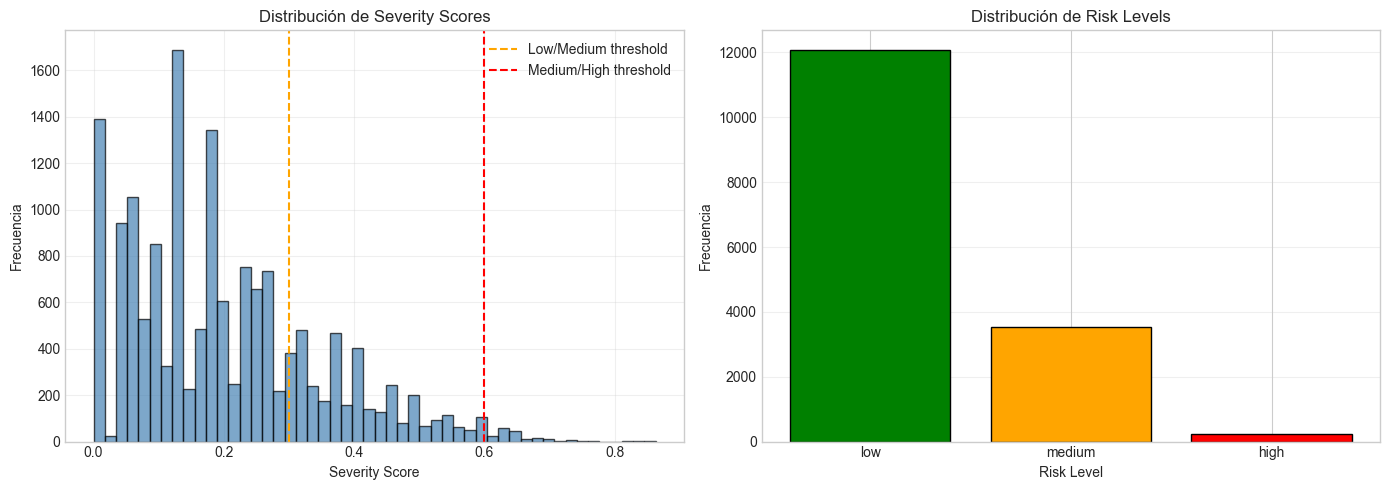


💾 Figura guardada: ../docs/figures/severity_distribution.png


In [9]:
# Visualizar distribución de severity scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(daily_pivot['severity_score'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(0.3, color='orange', linestyle='--', label='Low/Medium threshold')
axes[0].axvline(0.6, color='red', linestyle='--', label='Medium/High threshold')
axes[0].set_xlabel('Severity Score')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Severity Scores')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución por risk level
risk_counts = daily_pivot['risk_level'].value_counts()
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
axes[1].bar(risk_counts.index, risk_counts.values, 
           color=[colors.get(x, 'gray') for x in risk_counts.index],
           edgecolor='black')
axes[1].set_xlabel('Risk Level')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Risk Levels')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../docs/figures/severity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Figura guardada: ../docs/figures/severity_distribution.png")

## 4️⃣ Crear Features Adicionales

Además de los síntomas, necesitamos features de:
- **Demographics**: age, gender
- **Medical history**: número de brotes previos, días desde último brote
- **Temporal**: día de la semana, mes

In [10]:
# Añadir features demográficos
print("🔧 Añadiendo features demográficos...\n")

# Obtener age y sex del dataframe original
demographics = df[['user_id', 'age', 'sex']].drop_duplicates('user_id')

print(f"Usuarios con datos demográficos: {len(demographics)}")
print(f"\nEdad:")
print(f"  Disponible: {demographics['age'].notna().sum()} usuarios")
print(f"  Media: {demographics['age'].mean():.1f} años")
print(f"  Rango: {demographics['age'].min():.0f} - {demographics['age'].max():.0f}")

print(f"\nSexo:")
print(demographics['sex'].value_counts())

# Merge con daily_pivot
daily_pivot = daily_pivot.merge(demographics, on='user_id', how='left')

# Imputar valores faltantes
daily_pivot['age'].fillna(daily_pivot['age'].median(), inplace=True)
daily_pivot['sex'].fillna('unknown', inplace=True)

# Encode gender
gender_map = {'male': 'M', 'female': 'F', 'unknown': 'O', 'other': 'O'}
daily_pivot['gender'] = daily_pivot['sex'].map(gender_map).fillna('O')

print(f"\n✓ Features demográficos añadidos")

🔧 Añadiendo features demográficos...

Usuarios con datos demográficos: 2046

Edad:
  Disponible: 1944 usuarios
  Media: 21.7 años
  Rango: -19963 - 78

Sexo:
sex
female        1597
male           312
doesnt_say      55
other           32
Name: count, dtype: int64

✓ Features demográficos añadidos


In [11]:
# Calcular disease_duration_years (desde primera registro hasta cada fecha)
print("🔧 Calculando duración de la enfermedad...\n")

# Primera fecha de registro por usuario
first_checkin = df.groupby('user_id')['checkin_date'].min().reset_index()
first_checkin.columns = ['user_id', 'first_checkin']

daily_pivot = daily_pivot.merge(first_checkin, on='user_id', how='left')

# Calcular días desde primer registro
daily_pivot['days_since_first_checkin'] = (
    daily_pivot['checkin_date'] - daily_pivot['first_checkin']
).dt.days

# Convertir a años (aproximado)
daily_pivot['disease_duration_years'] = (daily_pivot['days_since_first_checkin'] / 365.25).fillna(0)

print(f"✓ Disease duration calculado")
print(f"  Media: {daily_pivot['disease_duration_years'].mean():.2f} años")
print(f"  Mediana: {daily_pivot['disease_duration_years'].median():.2f} años")

🔧 Calculando duración de la enfermedad...

✓ Disease duration calculado
  Media: 0.58 años
  Mediana: 0.17 años


In [12]:
# Calcular previous flares (brotes previos)
print("🔧 Calculando historial de brotes...\n")

# Un brote es cuando risk_level = 'high'
# Para cada fecha, contar cuántos días 'high' ha tenido el usuario antes

# Ordenar por usuario y fecha
daily_pivot = daily_pivot.sort_values(['user_id', 'checkin_date'])

# Identificar días de brote (high risk)
daily_pivot['is_flare_day'] = (daily_pivot['risk_level'] == 'high').astype(int)

# Calcular cumulative sum de días de brote por usuario
daily_pivot['cumulative_flare_days'] = daily_pivot.groupby('user_id')['is_flare_day'].cumsum()

# Previous flares = número de "episodios" de brote
# Un episodio = grupo de días consecutivos de high risk
# Simplificación: cada 7 días de brote = 1 episodio
daily_pivot['previous_flares'] = (daily_pivot['cumulative_flare_days'] / 7).astype(int)

print(f"✓ Previous flares calculado")
print(f"  Media: {daily_pivot['previous_flares'].mean():.2f} brotes")
print(f"  Max: {daily_pivot['previous_flares'].max():.0f} brotes")

🔧 Calculando historial de brotes...

✓ Previous flares calculado
  Media: 0.09 brotes
  Max: 6 brotes


In [13]:
# Calcular days since last flare
print("🔧 Calculando días desde último brote...\n")

# Para cada día, encontrar el último día con high risk
def calc_days_since_flare(group):
    group = group.sort_values('checkin_date')
    last_flare_date = None
    days_since = []
    
    for idx, row in group.iterrows():
        if last_flare_date is None:
            # No hay brote previo
            days_since.append(365)  # Default: 1 año
        else:
            days = (row['checkin_date'] - last_flare_date).days
            days_since.append(days)
        
        # Actualizar si este día es un brote
        if row['risk_level'] == 'high':
            last_flare_date = row['checkin_date']
    
    group['last_flare_days_ago'] = days_since
    return group

daily_pivot = daily_pivot.groupby('user_id', group_keys=False).apply(calc_days_since_flare)

print(f"✓ Days since last flare calculado")
print(f"  Media: {daily_pivot['last_flare_days_ago'].mean():.1f} días")
print(f"  Mediana: {daily_pivot['last_flare_days_ago'].median():.1f} días")

🔧 Calculando días desde último brote...



✓ Days since last flare calculado
  Media: 329.8 días
  Mediana: 365.0 días


In [14]:
# Features temporales
print("🔧 Añadiendo features temporales...\n")

daily_pivot['month'] = daily_pivot['checkin_date'].dt.month
daily_pivot['day_of_week'] = daily_pivot['checkin_date'].dt.dayofweek
daily_pivot['is_weekend'] = (daily_pivot['day_of_week'] >= 5).astype(int)

print("✓ Features temporales añadidos")

🔧 Añadiendo features temporales...

✓ Features temporales añadidos


## 5️⃣ Preparar Dataset Final para Entrenamiento

In [15]:
# Seleccionar features finales
print("📋 Seleccionando features finales...\n")

# Features de síntomas (normalizados 0-1)
symptom_features = [col for col in symptom_cols if col in daily_pivot.columns]

# Features demográficos
demographic_features = ['age', 'gender']

# Features de historial
history_features = ['disease_duration_years', 'previous_flares', 'last_flare_days_ago']

# Features temporales (opcionales, por si mejoran el modelo)
temporal_features = ['month', 'day_of_week']

# Target
target = 'risk_level'

all_features = symptom_features + demographic_features + history_features + temporal_features

print(f"Features seleccionadas ({len(all_features)}):")
print(f"  - Síntomas: {symptom_features}")
print(f"  - Demográficos: {demographic_features}")
print(f"  - Historial: {history_features}")
print(f"  - Temporales: {temporal_features}")
print(f"\nTarget: {target}")

📋 Seleccionando features finales...

Features seleccionadas (13):
  - Síntomas: ['abdominal_pain', 'blood_in_stool', 'diarrhea', 'fatigue', 'fever', 'nausea']
  - Demográficos: ['age', 'gender']
  - Historial: ['disease_duration_years', 'previous_flares', 'last_flare_days_ago']
  - Temporales: ['month', 'day_of_week']

Target: risk_level


In [16]:
# Crear dataset final
ml_dataset = daily_pivot[all_features + [target, 'user_id', 'checkin_date']].copy()

# Remover filas con valores faltantes críticos
print(f"\nDataset antes de limpieza: {len(ml_dataset):,} registros")

# Check missing values
missing = ml_dataset[all_features].isnull().sum()
if missing.sum() > 0:
    print(f"\n⚠️  Valores faltantes encontrados:")
    print(missing[missing > 0])
    
    # Imputar con medianas/modas
    for col in all_features:
        if ml_dataset[col].dtype in ['float64', 'int64']:
            ml_dataset[col].fillna(ml_dataset[col].median(), inplace=True)
        else:
            ml_dataset[col].fillna(ml_dataset[col].mode()[0], inplace=True)
    
    print(f"✓ Valores imputados")

print(f"\n✓ Dataset final: {len(ml_dataset):,} registros")
print(f"  Usuarios: {ml_dataset['user_id'].nunique():,}")
print(f"\nDistribución del target:")
print(ml_dataset[target].value_counts())
print(f"\nProporciones:")
print(ml_dataset[target].value_counts(normalize=True))


Dataset antes de limpieza: 15,847 registros

✓ Dataset final: 15,847 registros
  Usuarios: 1,704

Distribución del target:
risk_level
low       12075
medium     3538
high        234
Name: count, dtype: int64

Proporciones:
risk_level
low       0.761974
medium    0.223260
high      0.014766
Name: proportion, dtype: float64


📊 Análisis de correlaciones...



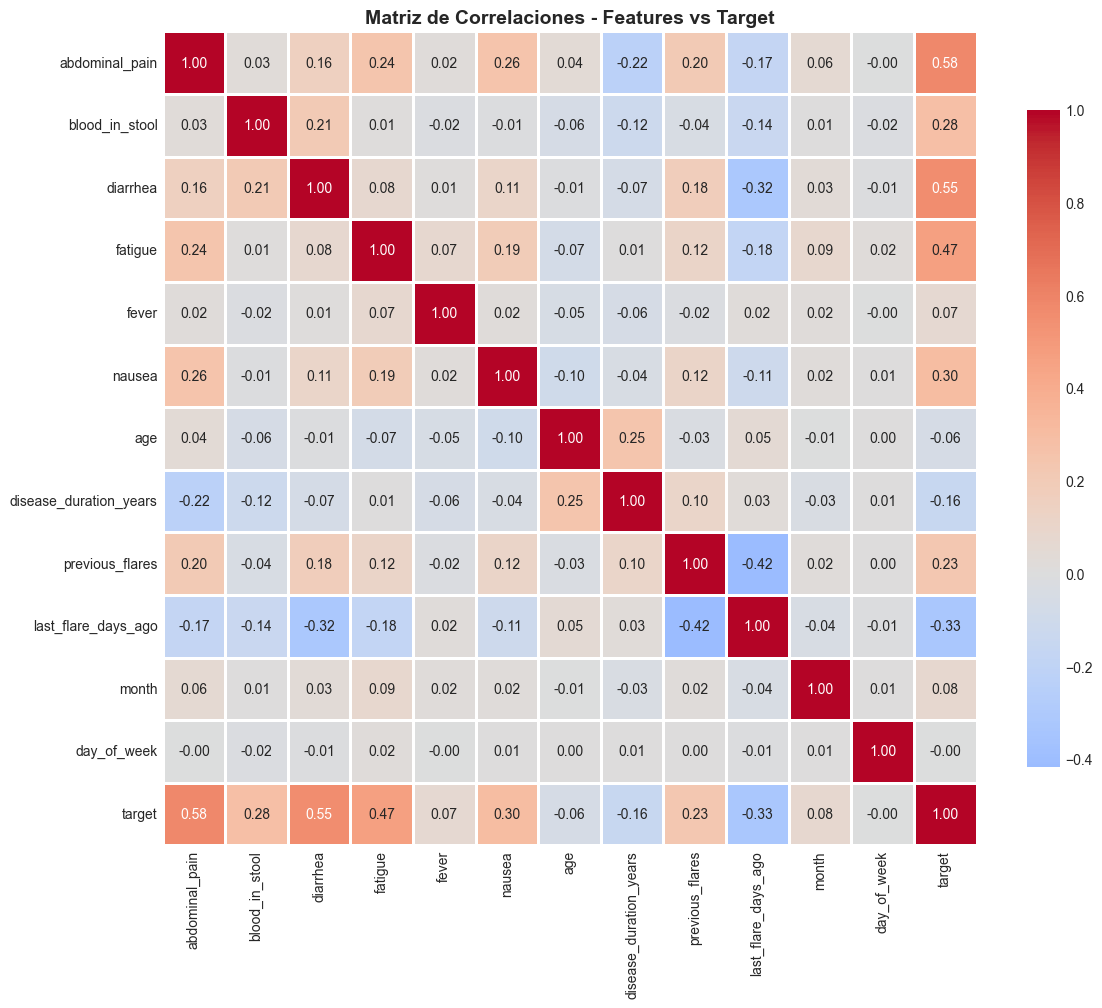


Top correlaciones con target (risk_level):
abdominal_pain            0.581523
diarrhea                  0.554281
fatigue                   0.466792
nausea                    0.298304
blood_in_stool            0.284513
previous_flares           0.225325
month                     0.076804
fever                     0.066040
day_of_week              -0.000324
age                      -0.061495
disease_duration_years   -0.156754
last_flare_days_ago      -0.328036
Name: target, dtype: float64


In [17]:
# Visualizar correlaciones de features
print("📊 Análisis de correlaciones...\n")

# Encode target para correlación
target_encoded = ml_dataset[target].map({'low': 0, 'medium': 1, 'high': 2})

# Seleccionar solo features numéricas para correlación
numeric_features = ml_dataset[all_features].select_dtypes(include=[np.number]).columns.tolist()

corr_data = ml_dataset[numeric_features].copy()
corr_data['target'] = target_encoded

# Matriz de correlación
corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaciones - Features vs Target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/figures/feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlaciones con target
print("\nTop correlaciones con target (risk_level):")
target_corr = corr_matrix['target'].sort_values(ascending=False)
print(target_corr[target_corr.index != 'target'])

## 6️⃣ Guardar Dataset Final

In [18]:
# Guardar dataset completo
output_path = '../data/processed/ml_dataset.csv'
ml_dataset.to_csv(output_path, index=False)

print(f"\n✅ Dataset guardado: {output_path}")
print(f"   Tamaño: {os.path.getsize(output_path)/(1024**2):.2f} MB")
print(f"   Registros: {len(ml_dataset):,}")
print(f"   Features: {len(all_features)}")

# Guardar también metadata
metadata = {
    'features': all_features,
    'symptom_features': symptom_features,
    'demographic_features': demographic_features,
    'history_features': history_features,
    'temporal_features': temporal_features,
    'target': target,
    'n_samples': len(ml_dataset),
    'n_users': ml_dataset['user_id'].nunique(),
    'class_distribution': ml_dataset[target].value_counts().to_dict()
}

import json
with open('../data/processed/ml_dataset_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"\n💾 Metadata guardada: ../data/processed/ml_dataset_metadata.json")


✅ Dataset guardado: ../data/processed/ml_dataset.csv
   Tamaño: 1.65 MB
   Registros: 15,847
   Features: 13

💾 Metadata guardada: ../data/processed/ml_dataset_metadata.json


## ✅ Resumen del Feature Engineering

### Lo que hemos logrado:

1. ✅ **Cargado y explorado** datos del notebook 01
2. ✅ **Categorizado síntomas** en 6 categorías principales
3. ✅ **Definido variable objetivo**: risk_level (low/medium/high) basado en severity score
4. ✅ **Creado features**:
   - 6 features de síntomas (normalizados 0-1)
   - 2 features demográficos (age, gender)
   - 3 features de historial médico
   - 2 features temporales
5. ✅ **Guardado dataset final** listo para entrenamiento

### Próximo paso: Notebook 03

En el siguiente notebook:
- Cargaremos este dataset procesado
- Haremos train/test split
- Entrenaremos RandomForest y otros modelos
- Evaluaremos performance
- Guardaremos el mejor modelo

### Notas importantes:

⚠️ **Desbalance de clases**: El dataset tiene más casos "low" que "medium" o "high".
En el notebook 03 necesitaremos:
- Usar `class_weight='balanced'` en RandomForest
- O aplicar SMOTE para balancear clases
- O usar stratified sampling

📊 **Correlaciones**: Los síntomas principales (abdominal_pain, diarrhea) tienen alta correlación con el target, lo cual es bueno para el modelo.

In [19]:
# Vista final del dataset
print("📋 Vista previa del dataset final:\n")
print(ml_dataset.head(10))

print(f"\n📊 Información del dataset:")
print(ml_dataset[all_features + [target]].info())

print(f"\n✨ Feature Engineering completado!")
print(f"   Siguiente: 03_model_training.ipynb")

📋 Vista previa del dataset final:

   abdominal_pain  blood_in_stool  diarrhea  fatigue  fever  nausea   age  \
0            0.00             0.0      1.00     0.00    0.0    1.00  26.0   
1            0.75             0.0      0.75     1.00    0.0    1.00  26.0   
2            0.00             0.0      0.00     1.00    0.0    0.25  32.0   
3            1.00             0.0      0.00     0.50    0.0    0.00  32.0   
4            0.75             0.0      0.00     0.75    0.0    0.00  32.0   
5            0.50             0.0      0.00     0.50    0.0    0.00  32.0   
6            0.50             0.0      0.00     1.00    0.0    0.00  32.0   
7            0.50             0.0      0.50     1.00    0.0    0.50  37.0   
8            0.50             0.0      0.25     0.75    0.0    0.25  37.0   
9            0.50             0.0      0.00     0.50    0.0    0.50  37.0   

  gender  disease_duration_years  previous_flares  last_flare_days_ago  month  \
0      F                0.005476    